# Loading libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [3]:
original_data = pd.read_csv('__datasets\Social_Network_Ads.csv')
original_data.drop(columns = ['User ID'], inplace = True)
original_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
...,...,...,...,...
395,Female,46.0,41000.0,1
396,Male,51.0,23000.0,1
397,Female,50.0,20000.0,1
398,Male,36.0,33000.0,0


# Analysis of dataset

In [4]:
def dataset_lookup(df):
    print('Dataset info:')
    print(df.info())
    print()
    print('Dataset description:')
    print(df.describe())
    print()
    print('Amount of duplicates:')
    duplicates_amount = df.duplicated().sum()
    print(duplicates_amount)
    if (duplicates_amount > 0):
        print('Duplicates:')
        print(df[df.duplicated()])
    print()
    print('Amount of missing values:')
    print(df.isna().sum(axis = 0))
    print()
    print('Unique values in each column:')
    object_types_count = 0
    for column in df:
        if df[column].dtypes == 'object':
            object_types_count += 1
            print('-' * len(column))
            print(f'{column}: {df[column].unique()}')
    if object_types_count == 0:
        print('-' * 10)
        print('No object columns in this dataset.')
        
dataset_lookup(original_data)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB
None

Dataset description:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

Amount of duplicates:
20
Duplicates:
     Gender   Age  EstimatedSalary  Purchased
74     Ma

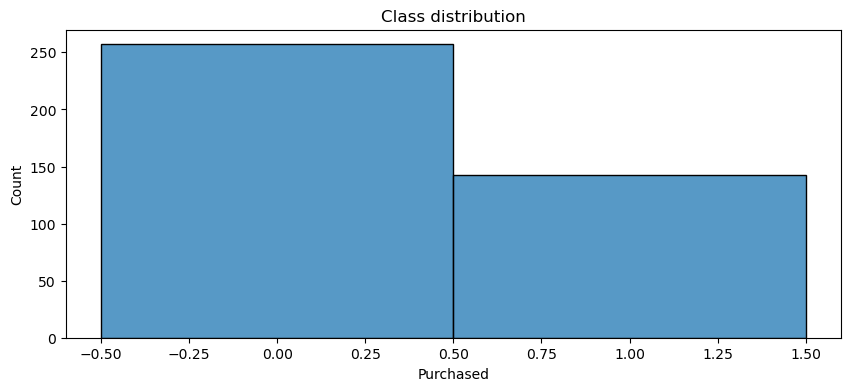

In [5]:
def show_class_distribution(y, encoder = None):
    plt.figure(figsize = (10, 4))
    plt.title('Class distribution')
    if encoder != None:
        sb.histplot(encoder.inverse_transform(y), discrete = True)
    else:
        sb.histplot(y, discrete = True)
    plt.show()
    
show_class_distribution(original_data['Purchased'])

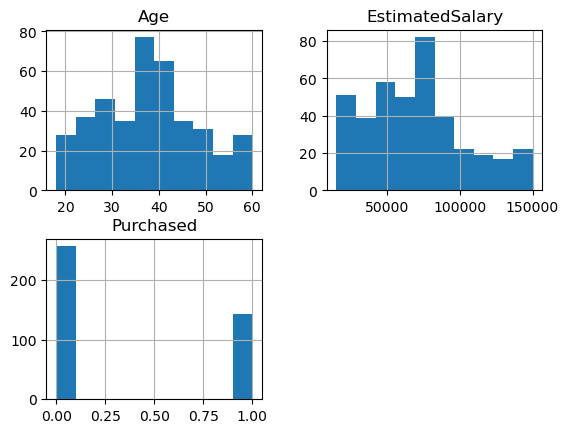

In [6]:
def plot_dataset_histograms(df):
    df.hist()
    plt.show()
    
plot_dataset_histograms(original_data)

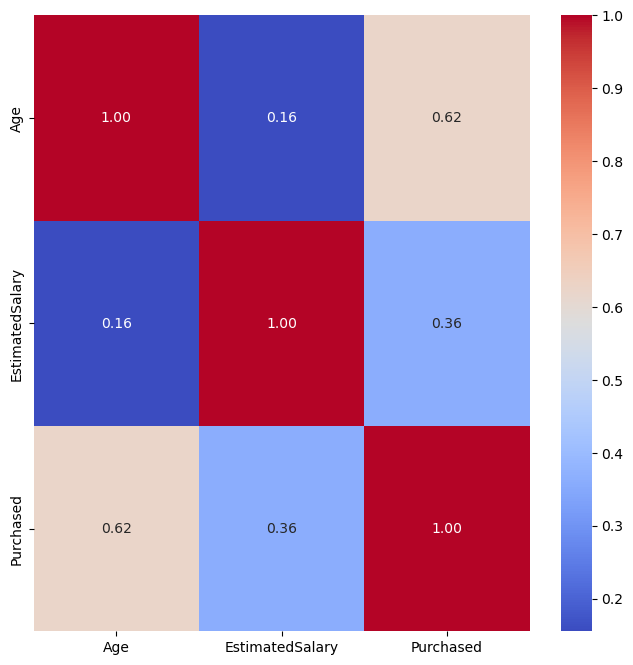

In [11]:
def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    sb.heatmap(
        df.select_dtypes(exclude = ['object']).corr(),
        annot = True,
        cmap = 'coolwarm',
        fmt = '.2f')
    plt.show()
    
show_correlation_map(original_data, figure_size = (8, 8))

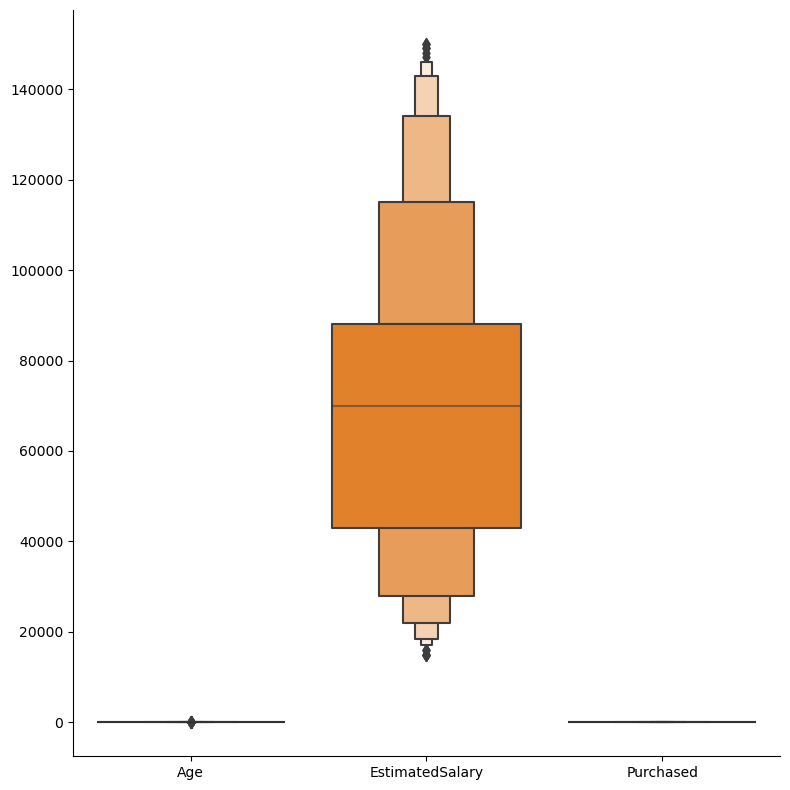

In [9]:
def show_cat_plot(df):
    sb.catplot(df, kind = 'boxen', height = 8)
    plt.show()
    
show_cat_plot(original_data)

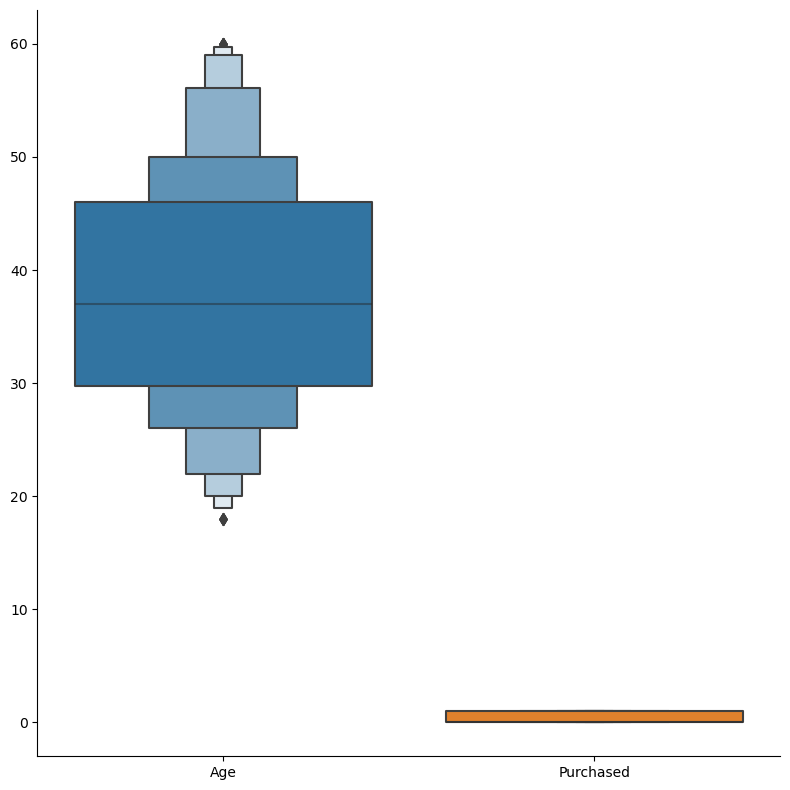

In [12]:
show_cat_plot(original_data.drop(columns = ['EstimatedSalary']))

<Figure size 1500x1500 with 0 Axes>

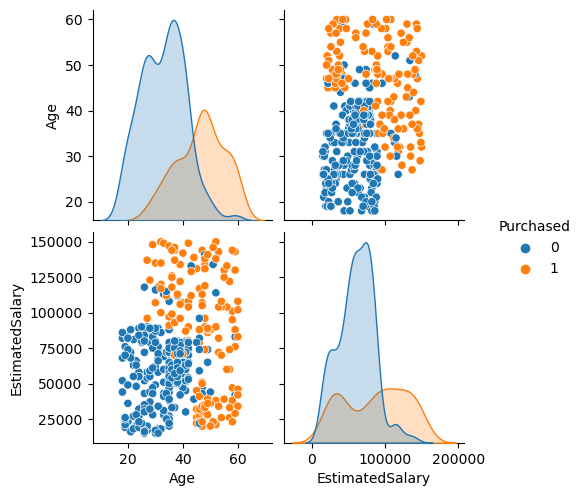

In [8]:
def show_pair_plot(df, figure_size = (15, 15), target_name = None):
    plt.figure(figsize = figure_size)
    sb.pairplot(df.select_dtypes(exclude = ['object']), palette = 'tab10', hue = target_name)
    plt.show()
    
show_pair_plot(original_data, target_name = 'Purchased')

# Preprocessing

In [15]:
dataset_preprocessed = original_data.copy()
dataset_preprocessed = pd.get_dummies(dataset_preprocessed, columns = ['Gender'])
dataset_preprocessed.replace({False: 0, True: 1}, inplace = True)
dataset_preprocessed

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_preprocessed.drop(columns = [
    'Gender_Female',
    'Gender_Male',
    'Purchased']))
dataset_standardized = pd.DataFrame(scaled_data, columns = [
    'Age',
    'EstimatedSalary'])
dataset_standardized

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [20]:
dataset_standardized.insert(2, 'Gender_Female', dataset_preprocessed['Gender_Female'])
dataset_standardized.insert(3, 'Gender_Male', dataset_preprocessed['Gender_Male'])
dataset_standardized.insert(4, 'Purchased', dataset_preprocessed['Purchased'])
dataset_standardized

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,-1.781797,-1.490046,0,1,0
1,-0.253587,-1.460681,0,1,0
2,-1.113206,-0.785290,1,0,0
3,-1.017692,-0.374182,1,0,0
4,-1.781797,0.183751,0,1,0
...,...,...,...,...,...
395,0.797057,-0.844019,1,0,1
396,1.274623,-1.372587,0,1,1
397,1.179110,-1.460681,1,0,1
398,-0.158074,-1.078938,0,1,0


# Clustering

In [21]:
data_for_clustering = dataset_standardized.drop(columns = ['Purchased'])
data_for_clustering

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,1
1,-0.253587,-1.460681,0,1
2,-1.113206,-0.785290,1,0
3,-1.017692,-0.374182,1,0
4,-1.781797,0.183751,0,1
...,...,...,...,...
395,0.797057,-0.844019,1,0
396,1.274623,-1.372587,0,1
397,1.179110,-1.460681,1,0
398,-0.158074,-1.078938,0,1


In [25]:
from sklearn_som.som import SOM
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = data_for_clustering.to_numpy()
#m, n - dimensions of rectangular matrix (their product should be equal to the amount of classes)
#dim - number of features
som = SOM(m = 2, n = 1, dim = 4, random_state = 42)
predictions = som.fit_predict(X)

print(f'Silhouette coefficient: {silhouette_score(X, predictions):.3f}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score(X, predictions):.3f}')
print(f'Davies-Bouldin score: {davies_bouldin_score(X, predictions):.3f}')

Silhouette coefficient: 0.229
Calinski-Harabasz score: 131.784
Davies-Bouldin score: 1.647


Silhouette score close to 0 indicates overlapping clusters.